# Proyecto ciencia de datos

Autores: Raúl Emiliano Guzmán Acevedo (A01754602)
Eduardo Vargas Soria (A1754700)
Rafael Mercado Garduño (A01746991)
José Alfredo García Jiménez (A01748001)
Manuel Montufar Galnares (A01754921)


Se importan todas las librerías importantes que vamos a necesitar:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import missingno as msno
import numpy as np
import statsmodels.api as smf
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from functools import reduce
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz
import pydotplus


Se leen los dos archivos tipo .xlsx 

In [4]:
df = pd.read_excel('/content/Publications17-21.xlsx')


In [3]:
df2=pd.read_excel('/content/AuthorsMetrics2012-2022.xlsx')


Los dos archivos se cambian de tipo .xlsx a .csv para que los tiempos de ejecución sean menores.

In [5]:
df.to_csv('/content/Publications17-21.xlsx', index=False)

In [6]:
df2.to_csv('/content/AuthorsMetrics2012-2022.xlsx', index=False)

In [7]:
df.head()

,Number of Authors,Scopus Author Ids,Year,Full date,Scopus Source title,Volume,Issue,Pages,Article number,ISSN,...,Quacquarelli Symonds (QS) Subject field name,Time Higher Education (THE) code,Time Higher Education (THE) field name,Sustainable Development Goals (2022),Topic Cluster name,Topic Cluster number,Topic name,Topic number,Topic Cluster Prominence Percentile,Topic Prominence Percentile
0,3,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,-,141-154,-,ISSN-03062619,...,Environmental Sciences| Architecture| Engineer...,37| 36,Physical Sciences| Engineering and Technology,SDG 7,"Electric Potential,Electric Inverters,DC-DC Co...",13,"Solar Cell,Photovoltaic Cells,Parameter Extrac...",4607,98.194,99.021
1,3,57192253056| 6701780106| 35320015600,2017,2017-03-01,Molecules,22,3,-,358,ISSN-14203049,...,Medicine| Engineering - Petroleum| Chemistry| ...,32| 37| 34,"Life Sciences| Physical Sciences| Clinical, pr...",-,"Coffee,Caffeine,Energy Drinks",1192,"Chlorogenic Acid,Cafestol,Coffee",5887,64.415,97.268
2,8,35241843100| 57194428895| 57194423859| 3660876...,2017,2017-09-01,Biomaterials,139,-,229-243,-,ISSN-01429612,...,"Engineering - Mechanical, Aeronautical & Manuf...",32| 36,Life Sciences| Engineering and Technology,-,"Cells,Neoplasms,Hydrogels",166,"Scaffold,Polyethylene Glycol Dimethacrylate Hy...",3938,96.856,99.859
3,6,6602296514| 25930849300| 56017651500| 55989808...,2017,2017-01-01,Journal of Sensors,2017,-,-,2630413,ISSN-1687725X,...,Engineering - Petroleum| Physics & Astronomy| ...,37| 36,Physical Sciences| Engineering and Technology,-,"Location,Algorithms,Wi-Fi",643,"Localization,Received Signal Strength,Wi-Fi",437,73.311,99.39
4,7,57316728100| 14051678800| 55557890800| 5574075...,2017,2017-01-15,Science of the Total Environment,576,-,646-659,-,ISSN-00489697,...,Environmental Sciences| Engineering - Petroleum,37,Physical Sciences,SDG 6| SDG 7| SDG 9| SDG 11,"Cellulose,Lignin,Cellulases",119,"Laccase,Coloring Agent,Trametes Versicolor",613,97.592,99.279


In [8]:
df2.head()

,Scopus author ID,Scholarly Output,Most recent publication,Citations,Citations per Publication,Field-Weighted Citation Impact,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996)
0,6503851729,8,2022,53,6.6,0.63,5,0,2004
1,6503865347,2,2019,37,18.5,0.98,6,0,2005
2,6503873393,1,2013,23,23.0,8.42,15,2,2011
3,6503876779,1,2019,1,1.0,0.87,7,0,2019
4,6503884764,3,2016,13,4.3,0.14,3,0,1999


Creamos una columna nueva que va a servirnos para separar los autores individualmente a sus trabajos.

In [9]:
Autores = []
for index, row in df.iterrows():
  txt = str(df.at[index, 'Scopus Author Ids'])
  sep = txt.split('| ')
  Autores.append(sep)
df['Autores'] = Autores
df.head()

,Number of Authors,Scopus Author Ids,Year,Full date,Scopus Source title,Volume,Issue,Pages,Article number,ISSN,...,Time Higher Education (THE) code,Time Higher Education (THE) field name,Sustainable Development Goals (2022),Topic Cluster name,Topic Cluster number,Topic name,Topic number,Topic Cluster Prominence Percentile,Topic Prominence Percentile,Autores
0,3,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,-,141-154,-,ISSN-03062619,...,37| 36,Physical Sciences| Engineering and Technology,SDG 7,"Electric Potential,Electric Inverters,DC-DC Co...",13,"Solar Cell,Photovoltaic Cells,Parameter Extrac...",4607,98.194,99.021,"[55391699600, 57195591068, 57195530606]"
1,3,57192253056| 6701780106| 35320015600,2017,2017-03-01,Molecules,22,3,-,358,ISSN-14203049,...,32| 37| 34,"Life Sciences| Physical Sciences| Clinical, pr...",-,"Coffee,Caffeine,Energy Drinks",1192,"Chlorogenic Acid,Cafestol,Coffee",5887,64.415,97.268,"[57192253056, 6701780106, 35320015600]"
2,8,35241843100| 57194428895| 57194423859| 3660876...,2017,2017-09-01,Biomaterials,139,-,229-243,-,ISSN-01429612,...,32| 36,Life Sciences| Engineering and Technology,-,"Cells,Neoplasms,Hydrogels",166,"Scaffold,Polyethylene Glycol Dimethacrylate Hy...",3938,96.856,99.859,"[35241843100, 57194428895, 57194423859, 366087..."
3,6,6602296514| 25930849300| 56017651500| 55989808...,2017,2017-01-01,Journal of Sensors,2017,-,-,2630413,ISSN-1687725X,...,37| 36,Physical Sciences| Engineering and Technology,-,"Location,Algorithms,Wi-Fi",643,"Localization,Received Signal Strength,Wi-Fi",437,73.311,99.39,"[6602296514, 25930849300, 56017651500, 5598980..."
4,7,57316728100| 14051678800| 55557890800| 5574075...,2017,2017-01-15,Science of the Total Environment,576,-,646-659,-,ISSN-00489697,...,37,Physical Sciences,SDG 6| SDG 7| SDG 9| SDG 11,"Cellulose,Lignin,Cellulases",119,"Laccase,Coloring Agent,Trametes Versicolor",613,97.592,99.279,"[57316728100, 14051678800, 55557890800, 557407..."


Se separan los autores por lo que ya tenemos los autores de manera individual en el primer dataframe

In [10]:
df = df.explode(column = 'Autores')
df['Number of Authors'] -=1
df.head()

,Number of Authors,Scopus Author Ids,Year,Full date,Scopus Source title,Volume,Issue,Pages,Article number,ISSN,...,Time Higher Education (THE) code,Time Higher Education (THE) field name,Sustainable Development Goals (2022),Topic Cluster name,Topic Cluster number,Topic name,Topic number,Topic Cluster Prominence Percentile,Topic Prominence Percentile,Autores
0,2,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,-,141-154,-,ISSN-03062619,...,37| 36,Physical Sciences| Engineering and Technology,SDG 7,"Electric Potential,Electric Inverters,DC-DC Co...",13,"Solar Cell,Photovoltaic Cells,Parameter Extrac...",4607,98.194,99.021,55391699600
0,2,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,-,141-154,-,ISSN-03062619,...,37| 36,Physical Sciences| Engineering and Technology,SDG 7,"Electric Potential,Electric Inverters,DC-DC Co...",13,"Solar Cell,Photovoltaic Cells,Parameter Extrac...",4607,98.194,99.021,57195591068
0,2,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,-,141-154,-,ISSN-03062619,...,37| 36,Physical Sciences| Engineering and Technology,SDG 7,"Electric Potential,Electric Inverters,DC-DC Co...",13,"Solar Cell,Photovoltaic Cells,Parameter Extrac...",4607,98.194,99.021,57195530606
1,2,57192253056| 6701780106| 35320015600,2017,2017-03-01,Molecules,22,3,-,358,ISSN-14203049,...,32| 37| 34,"Life Sciences| Physical Sciences| Clinical, pr...",-,"Coffee,Caffeine,Energy Drinks",1192,"Chlorogenic Acid,Cafestol,Coffee",5887,64.415,97.268,57192253056
1,2,57192253056| 6701780106| 35320015600,2017,2017-03-01,Molecules,22,3,-,358,ISSN-14203049,...,32| 37| 34,"Life Sciences| Physical Sciences| Clinical, pr...",-,"Coffee,Caffeine,Energy Drinks",1192,"Chlorogenic Acid,Cafestol,Coffee",5887,64.415,97.268,6701780106


In [11]:
df = df.rename(columns={'Autores':'Autores_chido'})
df = df.rename(columns={'Field-Weighted Citation Impact':'FWCI'})
df.head()

,Number of Authors,Scopus Author Ids,Year,Full date,Scopus Source title,Volume,Issue,Pages,Article number,ISSN,...,Time Higher Education (THE) code,Time Higher Education (THE) field name,Sustainable Development Goals (2022),Topic Cluster name,Topic Cluster number,Topic name,Topic number,Topic Cluster Prominence Percentile,Topic Prominence Percentile,Autores_chido
0,2,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,-,141-154,-,ISSN-03062619,...,37| 36,Physical Sciences| Engineering and Technology,SDG 7,"Electric Potential,Electric Inverters,DC-DC Co...",13,"Solar Cell,Photovoltaic Cells,Parameter Extrac...",4607,98.194,99.021,55391699600
0,2,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,-,141-154,-,ISSN-03062619,...,37| 36,Physical Sciences| Engineering and Technology,SDG 7,"Electric Potential,Electric Inverters,DC-DC Co...",13,"Solar Cell,Photovoltaic Cells,Parameter Extrac...",4607,98.194,99.021,57195591068
0,2,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,-,141-154,-,ISSN-03062619,...,37| 36,Physical Sciences| Engineering and Technology,SDG 7,"Electric Potential,Electric Inverters,DC-DC Co...",13,"Solar Cell,Photovoltaic Cells,Parameter Extrac...",4607,98.194,99.021,57195530606
1,2,57192253056| 6701780106| 35320015600,2017,2017-03-01,Molecules,22,3,-,358,ISSN-14203049,...,32| 37| 34,"Life Sciences| Physical Sciences| Clinical, pr...",-,"Coffee,Caffeine,Energy Drinks",1192,"Chlorogenic Acid,Cafestol,Coffee",5887,64.415,97.268,57192253056
1,2,57192253056| 6701780106| 35320015600,2017,2017-03-01,Molecules,22,3,-,358,ISSN-14203049,...,32| 37| 34,"Life Sciences| Physical Sciences| Clinical, pr...",-,"Coffee,Caffeine,Energy Drinks",1192,"Chlorogenic Acid,Cafestol,Coffee",5887,64.415,97.268,6701780106


Las siguientes lineas de código fue nuestro intento desesperado por hacer el .merge() de los dos dataframes, que como resultado nos dio el dataframe 1 y las metricas de cada autor pegadas a cada uno.

In [12]:
df2['clave'] = df2['Scopus author ID'].astype(str) + '_' + df2.groupby('Scopus author ID').cumcount().astype(str)

In [13]:
df2['Scopus author ID'] = df2['Scopus author ID'].astype('str')

In [14]:
dup = df2['Scopus author ID'].duplicated()

In [15]:
df2.drop_duplicates(subset='Scopus author ID', inplace=True)

In [16]:
df['Autores_chido'] = df['Autores_chido'].str.strip()

In [17]:
porfa_funca = pd.merge(df, df2[['Scopus author ID','clave','Scholarly Output','Most recent publication','Citations','Citations per Publication','Field-Weighted Citation Impact','h-index','Output in Top 10% Citation Percentiles (field-weighted)','Oldest publication (since 1996)']], left_on='Autores_chido', right_on='Scopus author ID')

In [18]:
porfa_funca

,Number of Authors,Scopus Author Ids,Year,Full date,Scopus Source title,Volume,Issue,Pages,Article number,ISSN,...,Scopus author ID,clave,Scholarly Output,Most recent publication,Citations_y,Citations per Publication,Field-Weighted Citation Impact,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996)
0,2,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,-,141-154,-,ISSN-03062619,...,55391699600,55391699600_0,32,2018,631,19.7,1.36,32,4,2016
1,5,55391699600| 8704481100| 56000906900| 66039864...,2017,2017-08-15,Expert Systems with Applications,79,-,164-180,-,ISSN-09574174,...,55391699600,55391699600_0,32,2018,631,19.7,1.36,32,4,2016
2,2,55391699600| 8704481100| 57193795678,2017,2017-01-01,Journal of Physics: Conference Series,803,1,-,12111,ISSN-17426588,...,55391699600,55391699600_0,32,2018,631,19.7,1.36,32,4,2016
3,2,56000906900| 47661594300| 55391699600,2017,2017-01-01,Studies in Computational Intelligence,686,-,65-93,-,ISSN-1860949X,...,55391699600,55391699600_0,32,2018,631,19.7,1.36,32,4,2016
4,1,55391699600| 56000906900,2017,2017-01-01,Intelligent Systems Reference Library,117,-,135-157,-,ISSN-18684394,...,55391699600,55391699600_0,32,2018,631,19.7,1.36,32,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261020,9,55270259900| 57222313664| 23480059500| 5601386...,2021,2021-01-01,Journal of Oncology,2021,-,-,6635650,ISSN-16878450,...,57222313664,57222313664_0,1,2021,0,0.0,0.00,0,0,2021
261021,9,55270259900| 57222313664| 23480059500| 5601386...,2021,2021-01-01,Journal of Oncology,2021,-,-,6635650,ISSN-16878450,...,57222327135,57222327135_0,1,2021,0,0.0,0.00,0,0,2021
261022,9,55270259900| 57222313664| 23480059500| 5601386...,2021,2021-01-01,Journal of Oncology,2021,-,-,6635650,ISSN-16878450,...,57222314992,57222314992_0,1,2021,0,0.0,0.00,0,0,2021
261023,9,55270259900| 57222313664| 23480059500| 5601386...,2021,2021-01-01,Journal of Oncology,2021,-,-,6635650,ISSN-16878450,...,57222320987,57222320987_0,1,2021,0,0.0,0.00,0,0,2021


In [21]:
df_corr1 = porfa_funca.corr()

<Axes: >

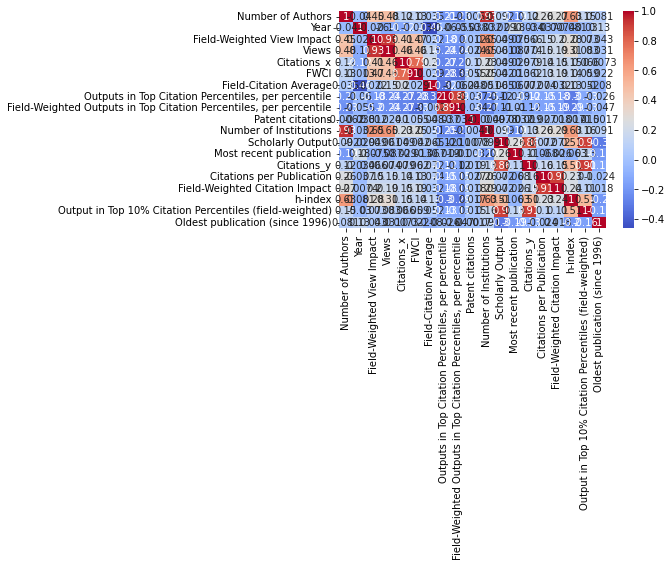

In [22]:
sns.heatmap(df_corr1, cmap='coolwarm', annot=True)

# Limpieza de datos.

In [ ]:
#df_final = porfa_funca.drop(['Number of Authors','Scopus Authors Ids','Full date','Pages','Issues','Volume','ISSN',''],axis = 1)

In [ ]:
df_medio = porfa_funca[['Year','Scopus Source title','Source type','FWCI','Field-Citation Average','Publication type','Autores_chido','Most recent publication','h-index','Views','Citations per Publication']]

Eliminamos varias columnas que no nos sirven y nos quedamos con un dataframe más pequeño y fácil de manejar.

In [ ]:
df_medio

,Year,Scopus Source title,Source type,FWCI,Field-Citation Average,Publication type,Autores_chido,Most recent publication,h-index,Views,Citations per Publication
0,2017,Applied Energy,Journal,16.56,11.23,Article,55391699600,2018,32,68,19.7
1,2017,Expert Systems with Applications,Journal,10.23,8.80,Article,55391699600,2018,32,87,19.7
2,2017,Journal of Physics: Conference Series,Conference Proceeding,1.79,1.67,Conference Paper,55391699600,2018,32,36,19.7
3,2017,Studies in Computational Intelligence,Book Series,0.46,13.15,Article,55391699600,2018,32,28,19.7
4,2017,Intelligent Systems Reference Library,Book Series,1.21,1.65,Chapter,55391699600,2018,32,33,19.7
...,...,...,...,...,...,...,...,...,...,...,...
261020,2021,Journal of Oncology,Journal,0.00,3.41,Article,57222313664,2021,0,7,0.0
261021,2021,Journal of Oncology,Journal,0.00,3.41,Article,57222327135,2021,0,7,0.0
261022,2021,Journal of Oncology,Journal,0.00,3.41,Article,57222314992,2021,0,7,0.0
261023,2021,Journal of Oncology,Journal,0.00,3.41,Article,57222320987,2021,0,7,0.0


In [ ]:
df_medio = porfa_funca[['Autores_chido','Most recent publication','Field-Weighted Citation Impact','h-index','Scopus Source title','Year','Source type','FWCI','Field-Citation Average','Publication type','Views','Citations per Publication']]

In [ ]:
df_medio

,Autores_chido,Most recent publication,Field-Weighted Citation Impact,h-index,Scopus Source title,Year,Source type,FWCI,Field-Citation Average,Publication type,Views,Citations per Publication
0,55391699600,2018,1.36,32,Applied Energy,2017,Journal,16.56,11.23,Article,68,19.7
1,55391699600,2018,1.36,32,Expert Systems with Applications,2017,Journal,10.23,8.80,Article,87,19.7
2,55391699600,2018,1.36,32,Journal of Physics: Conference Series,2017,Conference Proceeding,1.79,1.67,Conference Paper,36,19.7
3,55391699600,2018,1.36,32,Studies in Computational Intelligence,2017,Book Series,0.46,13.15,Article,28,19.7
4,55391699600,2018,1.36,32,Intelligent Systems Reference Library,2017,Book Series,1.21,1.65,Chapter,33,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...
261020,57222313664,2021,0.00,0,Journal of Oncology,2021,Journal,0.00,3.41,Article,7,0.0
261021,57222327135,2021,0.00,0,Journal of Oncology,2021,Journal,0.00,3.41,Article,7,0.0
261022,57222314992,2021,0.00,0,Journal of Oncology,2021,Journal,0.00,3.41,Article,7,0.0
261023,57222320987,2021,0.00,0,Journal of Oncology,2021,Journal,0.00,3.41,Article,7,0.0


In [ ]:
#df_medio.drop(df_medio[(df_medio['Most recent publication']<2017).index,inplace=True)

Limpiamos datos de Most recent publication que sean menores a 2017

In [ ]:
df_medio.drop(df_medio[(df_medio['Most recent publication'] < 2017)].index, inplace=True)

<ipython-input-24-a5a576244269>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medio.drop(df_medio[(df_medio['Most recent publication'] < 2017)].index, inplace=True)


In [ ]:
df_medio

,Autores_chido,Most recent publication,Field-Weighted Citation Impact,h-index,Scopus Source title,Year,Source type,FWCI,Field-Citation Average,Publication type,Views,Citations per Publication
0,55391699600,2018,1.36,32,Applied Energy,2017,Journal,16.56,11.23,Article,68,19.7
1,55391699600,2018,1.36,32,Expert Systems with Applications,2017,Journal,10.23,8.80,Article,87,19.7
2,55391699600,2018,1.36,32,Journal of Physics: Conference Series,2017,Conference Proceeding,1.79,1.67,Conference Paper,36,19.7
3,55391699600,2018,1.36,32,Studies in Computational Intelligence,2017,Book Series,0.46,13.15,Article,28,19.7
4,55391699600,2018,1.36,32,Intelligent Systems Reference Library,2017,Book Series,1.21,1.65,Chapter,33,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...
261020,57222313664,2021,0.00,0,Journal of Oncology,2021,Journal,0.00,3.41,Article,7,0.0
261021,57222327135,2021,0.00,0,Journal of Oncology,2021,Journal,0.00,3.41,Article,7,0.0
261022,57222314992,2021,0.00,0,Journal of Oncology,2021,Journal,0.00,3.41,Article,7,0.0
261023,57222320987,2021,0.00,0,Journal of Oncology,2021,Journal,0.00,3.41,Article,7,0.0


In [ ]:
#df_medio.mean('FWCI')

Las siguientes lineas son para eliminar datos del FWCI usando el promedio y los que estuvieran por debajo los quitamos.

In [ ]:
promedio = df_medio['FWCI'].mean()
max = df_medio['FWCI'].max()


In [ ]:
print(promedio)

1.2020049720578567


In [ ]:
print(max)

832.75


In [ ]:
df_medio.drop(df_medio[(df_medio['FWCI'] < 1.2)].index, inplace=True)

<ipython-input-30-05e22d9cc1f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medio.drop(df_medio[(df_medio['FWCI'] < 1.2)].index, inplace=True)


In [ ]:
df_medio

,Autores_chido,Most recent publication,Field-Weighted Citation Impact,h-index,Scopus Source title,Year,Source type,FWCI,Field-Citation Average,Publication type,Views,Citations per Publication
0,55391699600,2018,1.36,32,Applied Energy,2017,Journal,16.56,11.23,Article,68,19.7
1,55391699600,2018,1.36,32,Expert Systems with Applications,2017,Journal,10.23,8.80,Article,87,19.7
2,55391699600,2018,1.36,32,Journal of Physics: Conference Series,2017,Conference Proceeding,1.79,1.67,Conference Paper,36,19.7
4,55391699600,2018,1.36,32,Intelligent Systems Reference Library,2017,Book Series,1.21,1.65,Chapter,33,19.7
7,55391699600,2018,1.36,32,Intelligent Systems Reference Library,2017,Book Series,1.21,1.65,Chapter,34,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...
259317,57539194800,2022,0.84,1,Revista de Filosofia (Venezuela),2021,Journal,1.67,0.60,Article,0,0.5
259323,57694152500,2021,3.58,1,Research Handbook on Energy and Society,2021,Book,3.58,0.28,Chapter,2,1.0
259342,55387280800,2021,1.72,2,The Oxford Handbook of Politics and Performance,2021,Book,4.93,0.20,Chapter,3,1.3
259343,57226542536,2021,6.98,1,Headless Relative Clauses in Mesoamerican Lang...,2021,Book,6.98,0.14,Chapter,3,1.0


Esta linea de codigo nos da informacion general de como va nuestro dataframe

In [ ]:
df_medio.describe()

,Most recent publication,Field-Weighted Citation Impact,h-index,Year,FWCI,Field-Citation Average,Views,Citations per Publication
count,63041.000000,63041.000000,63041.000000,63041.000000,63041.000000,63041.000000,63041.000000,63041.000000
mean,2020.901746,2.401145,24.468933,2019.126679,3.536442,8.018916,64.558113,30.193496
std,1.469235,5.127068,29.249434,1.420717,8.455787,5.540256,140.250368,91.527019
min,2017.000000,0.000000,1.000000,2017.000000,1.200000,0.030000,0.000000,0.000000
25%,2020.000000,0.930000,6.000000,2018.000000,1.550000,3.500000,19.000000,7.200000
50%,2022.000000,1.480000,14.000000,2019.000000,2.110000,7.830000,35.000000,14.100000
75%,2022.000000,2.590000,30.000000,2020.000000,3.320000,11.250000,69.000000,28.300000
max,2023.000000,315.050000,190.000000,2021.000000,832.750000,66.750000,5071.000000,3700.000000


In [ ]:
#contar = df_medio['Autores_chido'].()

In [ ]:
#print(contar)

Aquí vemos la cantidad de publicaciones que tiene cada autor y los que tengan menos de 4 se van.



In [ ]:
freq = df_medio.groupby(['Autores_chido']).count()

In [ ]:
print(freq)

               Most recent publication  Field-Weighted Citation Impact  \
Autores_chido                                                            
10038794100                          7                               7   
10039519300                          8                               8   
10039829800                          9                               9   
10039944500                          8                               8   
10040539200                          1                               1   
...                                ...                             ...   
9746415200                          13                              13   
9747555200                           3                               3   
9841479000                           1                               1   
9941446400                           2                               2   
9943655600                           4                               4   

               h-index  Scopus Source

In [ ]:
df_medio

,Autores_chido,Most recent publication,Field-Weighted Citation Impact,h-index,Scopus Source title,Year,Source type,FWCI,Field-Citation Average,Publication type,Views,Citations per Publication
0,55391699600,2018,1.36,32,Applied Energy,2017,Journal,16.56,11.23,Article,68,19.7
1,55391699600,2018,1.36,32,Expert Systems with Applications,2017,Journal,10.23,8.80,Article,87,19.7
2,55391699600,2018,1.36,32,Journal of Physics: Conference Series,2017,Conference Proceeding,1.79,1.67,Conference Paper,36,19.7
4,55391699600,2018,1.36,32,Intelligent Systems Reference Library,2017,Book Series,1.21,1.65,Chapter,33,19.7
7,55391699600,2018,1.36,32,Intelligent Systems Reference Library,2017,Book Series,1.21,1.65,Chapter,34,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...
259317,57539194800,2022,0.84,1,Revista de Filosofia (Venezuela),2021,Journal,1.67,0.60,Article,0,0.5
259323,57694152500,2021,3.58,1,Research Handbook on Energy and Society,2021,Book,3.58,0.28,Chapter,2,1.0
259342,55387280800,2021,1.72,2,The Oxford Handbook of Politics and Performance,2021,Book,4.93,0.20,Chapter,3,1.3
259343,57226542536,2021,6.98,1,Headless Relative Clauses in Mesoamerican Lang...,2021,Book,6.98,0.14,Chapter,3,1.0


In [ ]:
trabajos = df_medio.groupby('Autores_chido')['Most recent publication'].count().reset_index()

In [ ]:
print(trabajos)

      Autores_chido  Most recent publication
0       10038794100                        7
1       10039519300                        8
2       10039829800                        9
3       10039944500                        8
4       10040539200                        1
...             ...                      ...
19622    9746415200                       13
19623    9747555200                        3
19624    9841479000                        1
19625    9941446400                        2
19626    9943655600                        4

[19627 rows x 2 columns]


In [ ]:
autores_pocos = trabajos[trabajos['Most recent publication']<5]['Autores_chido']

In [ ]:
autores_pocos = trabajos[trabajos['Most recent publication']>10]['Autores_chido']

In [ ]:
df_medio = df_medio[~df_medio['Autores_chido'].isin(autores_pocos)]

In [ ]:
df_medio

,Autores_chido,Most recent publication,Field-Weighted Citation Impact,h-index,Scopus Source title,Year,Source type,FWCI,Field-Citation Average,Publication type,Views,Citations per Publication
0,55391699600,2018,1.36,32,Applied Energy,2017,Journal,16.56,11.23,Article,68,19.7
1,55391699600,2018,1.36,32,Expert Systems with Applications,2017,Journal,10.23,8.80,Article,87,19.7
2,55391699600,2018,1.36,32,Journal of Physics: Conference Series,2017,Conference Proceeding,1.79,1.67,Conference Paper,36,19.7
4,55391699600,2018,1.36,32,Intelligent Systems Reference Library,2017,Book Series,1.21,1.65,Chapter,33,19.7
7,55391699600,2018,1.36,32,Intelligent Systems Reference Library,2017,Book Series,1.21,1.65,Chapter,34,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...
259317,57539194800,2022,0.84,1,Revista de Filosofia (Venezuela),2021,Journal,1.67,0.60,Article,0,0.5
259323,57694152500,2021,3.58,1,Research Handbook on Energy and Society,2021,Book,3.58,0.28,Chapter,2,1.0
259342,55387280800,2021,1.72,2,The Oxford Handbook of Politics and Performance,2021,Book,4.93,0.20,Chapter,3,1.3
259343,57226542536,2021,6.98,1,Headless Relative Clauses in Mesoamerican Lang...,2021,Book,6.98,0.14,Chapter,3,1.0


In [ ]:
df_medio.drop(df_medio[(df_medio['Year'] < 2018)].index, inplace=True)

<ipython-input-44-69b6f9fc8a4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medio.drop(df_medio[(df_medio['Year'] < 2018)].index, inplace=True)


Hasta este punto nuestro dataframe va así:

In [ ]:
df_medio

,Autores_chido,Most recent publication,Field-Weighted Citation Impact,h-index,Scopus Source title,Year,Source type,FWCI,Field-Citation Average,Publication type,Views,Citations per Publication
21,55391699600,2018,1.36,32,Studies in Computational Intelligence,2018,Book Series,3.68,3.53,Chapter,34,19.7
22,55391699600,2018,1.36,32,Soft Computing,2020,Journal,2.63,4.94,Article,19,19.7
23,55391699600,2018,1.36,32,Mathematics,2020,Journal,1.80,2.78,Article,29,19.7
25,55391699600,2018,1.36,32,Soft Computing,2021,Journal,12.34,2.19,Article,97,19.7
27,57192253056,2021,1.64,8,Journal of Food Science,2018,Journal,1.56,10.92,Article,58,36.4
...,...,...,...,...,...,...,...,...,...,...,...,...
259317,57539194800,2022,0.84,1,Revista de Filosofia (Venezuela),2021,Journal,1.67,0.60,Article,0,0.5
259323,57694152500,2021,3.58,1,Research Handbook on Energy and Society,2021,Book,3.58,0.28,Chapter,2,1.0
259342,55387280800,2021,1.72,2,The Oxford Handbook of Politics and Performance,2021,Book,4.93,0.20,Chapter,3,1.3
259343,57226542536,2021,6.98,1,Headless Relative Clauses in Mesoamerican Lang...,2021,Book,6.98,0.14,Chapter,3,1.0


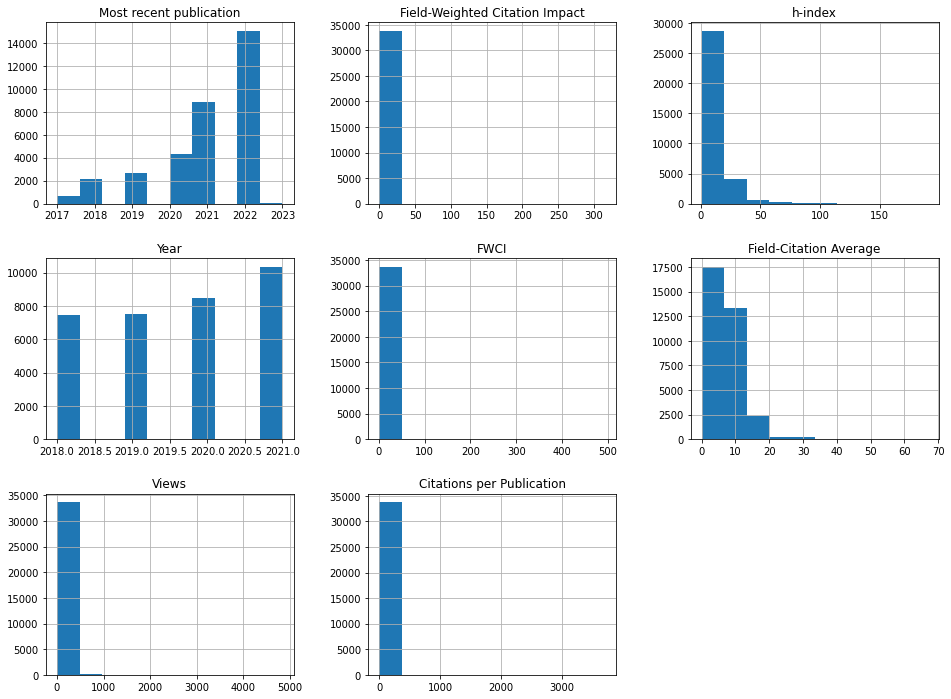

In [ ]:
df_medio.hist(figsize=(16,12))
plt.show()

In [ ]:
df_medio.corr()

,Most recent publication,Field-Weighted Citation Impact,h-index,Year,FWCI,Field-Citation Average,Views,Citations per Publication
Most recent publication,1.000000,-0.081352,0.081198,0.256978,0.001292,-0.124820,-0.018406,-0.122571
Field-Weighted Citation Impact,-0.081352,1.000000,0.024923,0.023389,0.263519,0.008973,0.158914,0.789943
h-index,0.081198,0.024923,1.000000,-0.085331,0.067716,0.134939,0.053565,0.086314
Year,0.256978,0.023389,-0.085331,1.000000,0.032256,-0.535056,-0.032829,-0.059135
FWCI,0.001292,0.263519,0.067716,0.032256,1.000000,-0.022721,0.407432,0.145101
Field-Citation Average,-0.124820,0.008973,0.134939,-0.535056,-0.022721,1.000000,0.118059,0.128522
Views,-0.018406,0.158914,0.053565,-0.032829,0.407432,0.118059,1.000000,0.111916
Citations per Publication,-0.122571,0.789943,0.086314,-0.059135,0.145101,0.128522,0.111916,1.000000


In [ ]:
df_corr = df_medio.corr()

<Axes: >

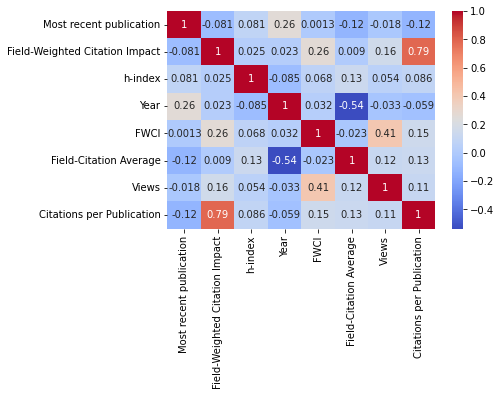

In [ ]:
sns.heatmap(df_corr, cmap='coolwarm', annot=True)

In [ ]:
df_medio.describe()

,Most recent publication,Field-Weighted Citation Impact,h-index,Year,FWCI,Field-Citation Average,Views,Citations per Publication
count,33818.000000,33818.000000,33818.000000,33818.000000,33818.000000,33818.000000,33818.000000,33818.000000
mean,2020.892247,1.758433,11.041280,2019.641049,3.121276,7.063440,46.472322,17.185428
std,1.330472,3.659136,12.172317,1.133355,6.487810,5.301376,129.951540,54.967480
min,2017.000000,0.000000,1.000000,2018.000000,1.200000,0.030000,0.000000,0.000000
25%,2020.000000,0.790000,3.000000,2019.000000,1.500000,2.940000,16.000000,5.400000
50%,2021.000000,1.200000,8.000000,2020.000000,1.960000,6.390000,29.000000,10.200000
75%,2022.000000,1.910000,14.000000,2021.000000,2.940000,10.200000,52.000000,18.000000
max,2023.000000,315.050000,190.000000,2021.000000,493.510000,66.750000,4835.000000,3700.000000


In [ ]:
coso_nuevo = df_medio.groupby('Autores_chido')['Field-Weighted Citation Impact'].mean().reset_index()

In [ ]:
coso_nuevo

,Autores_chido,Field-Weighted Citation Impact
0,10038794100,2.88
1,10039519300,2.88
2,10039829800,2.88
3,10039944500,0.00
4,10042969200,0.56
...,...,...
16684,9744048800,0.45
16685,9745459900,1.25
16686,9747555200,1.14
16687,9941446400,0.53


In [ ]:
coso_nuevo.describe()

,Field-Weighted Citation Impact
count,16689.000000
mean,1.717901
std,4.208572
min,0.000000
25%,0.730000
50%,1.170000
75%,1.870000
max,315.050000


In [ ]:
coso_a = df_medio.groupby('Autores_chido')['FWCI'].mean().reset_index()

In [ ]:
coso_a

,Autores_chido,FWCI
0,10038794100,2.364286
1,10039519300,2.364286
2,10039829800,2.265000
3,10039944500,2.364286
4,10042969200,1.403333
...,...,...
16684,9744048800,1.220000
16685,9745459900,4.630000
16686,9747555200,2.330000
16687,9941446400,1.495000


In [ ]:
coso_h = df_medio.groupby('Autores_chido')['h-index'].mean().reset_index()

In [ ]:
coso_h

,Autores_chido,h-index
0,10038794100,33.0
1,10039519300,32.0
2,10039829800,33.0
3,10039944500,31.0
4,10042969200,10.0
...,...,...
16684,9744048800,9.0
16685,9745459900,11.0
16686,9747555200,5.0
16687,9941446400,12.0


In [ ]:
coso_b = df_medio.groupby('Autores_chido')['Views'].mean().reset_index()

In [ ]:
coso_b

,Autores_chido,Views
0,10038794100,38.142857
1,10039519300,38.142857
2,10039829800,35.375000
3,10039944500,38.142857
4,10042969200,24.666667
...,...,...
16684,9744048800,28.000000
16685,9745459900,23.600000
16686,9747555200,62.666667
16687,9941446400,59.500000


In [ ]:
coso_c = df_medio.groupby('Autores_chido')['Citations per Publication'].sum().reset_index()

In [ ]:
coso_c

,Autores_chido,Citations per Publication
0,10038794100,28.0
1,10039519300,28.0
2,10039829800,32.0
3,10039944500,7.0
4,10042969200,14.4
...,...,...
16684,9744048800,15.2
16685,9745459900,87.0
16686,9747555200,51.6
16687,9941446400,12.6


In [ ]:
dfs = [coso_nuevo, coso_a, coso_h, coso_b, coso_c]

In [ ]:
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['Autores_chido'],
                                            how='outer'), dfs)

In [ ]:
final_df

,Autores_chido,Field-Weighted Citation Impact,FWCI,h-index,Views,Citations per Publication
0,10038794100,2.88,2.364286,33.0,38.142857,28.0
1,10039519300,2.88,2.364286,32.0,38.142857,28.0
2,10039829800,2.88,2.265000,33.0,35.375000,32.0
3,10039944500,0.00,2.364286,31.0,38.142857,7.0
4,10042969200,0.56,1.403333,10.0,24.666667,14.4
...,...,...,...,...,...,...
16684,9744048800,0.45,1.220000,9.0,28.000000,15.2
16685,9745459900,1.25,4.630000,11.0,23.600000,87.0
16686,9747555200,1.14,2.330000,5.0,62.666667,51.6
16687,9941446400,0.53,1.495000,12.0,59.500000,12.6


In [ ]:
final_df.isna().sum()

Autores_chido                     0
Field-Weighted Citation Impact    0
FWCI                              0
h-index                           0
Views                             0
Citations per Publication         0
dtype: int64

<Axes: >

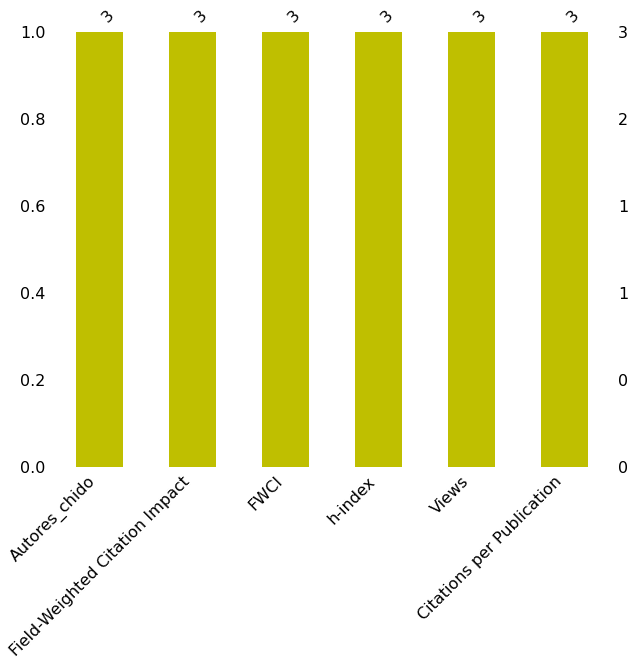

In [ ]:
msno.bar(final_df, color = 'y', figsize = (10,8))

In [ ]:
final_df.drop(final_df[(final_df['Field-Weighted Citation Impact'] < 2)].index, inplace=True)

In [ ]:
final_df.drop(final_df[(final_df['FWCI'] < 3)].index, inplace=True)

In [ ]:
final_df.drop(final_df[(final_df['h-index'] < 8)].index, inplace=True)

In [ ]:
final_df

,Autores_chido,Field-Weighted Citation Impact,FWCI,h-index,Views,Citations per Publication
21,10641656400,2.86,8.560000,22.0,64.000000,25.0
24,10739506200,2.13,5.544286,15.0,62.285714,214.9
53,12140806500,2.22,4.953333,21.0,18.000000,128.4
69,12753375600,3.28,4.431667,41.0,50.500000,474.0
81,12775969500,3.34,3.940000,8.0,24.750000,12.0
...,...,...,...,...,...,...
16606,8899247800,9.03,4.918000,22.0,89.800000,145.0
16614,8920367600,5.28,4.160000,54.0,63.000000,38.2
16633,8954191100,3.00,3.630000,26.0,23.333333,291.3
16653,9233714800,6.81,6.810000,33.0,57.000000,13.0


In [ ]:
df_corr2 = final_df.corr()

<Axes: >

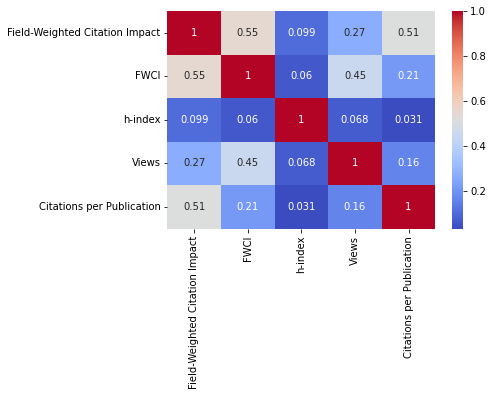

In [ ]:
sns.heatmap(df_corr2, cmap='coolwarm', annot=True)

Entrenamiento

In [ ]:
target = "Field-Weighted Citation Impact"

categ_cols = [cname for cname in final_df.columns if final_df[cname].dtype == "object"]
numeric_cols = [cname for cname in final_df.columns if final_df[cname].dtype in ['int64', 'float64', 'uint8','int8']]

In [ ]:
num_df = final_df[numeric_cols]
num_df

,Field-Weighted Citation Impact,FWCI,h-index,Views,Citations per Publication
21,2.86,8.560000,22.0,64.000000,25.0
24,2.13,5.544286,15.0,62.285714,214.9
53,2.22,4.953333,21.0,18.000000,128.4
69,3.28,4.431667,41.0,50.500000,474.0
81,3.34,3.940000,8.0,24.750000,12.0
...,...,...,...,...,...
16606,9.03,4.918000,22.0,89.800000,145.0
16614,5.28,4.160000,54.0,63.000000,38.2
16633,3.00,3.630000,26.0,23.333333,291.3
16653,6.81,6.810000,33.0,57.000000,13.0


In [ ]:
X = num_df.drop(target,axis=1)
X

,FWCI,h-index,Views,Citations per Publication
21,8.560000,22.0,64.000000,25.0
24,5.544286,15.0,62.285714,214.9
53,4.953333,21.0,18.000000,128.4
69,4.431667,41.0,50.500000,474.0
81,3.940000,8.0,24.750000,12.0
...,...,...,...,...
16606,4.918000,22.0,89.800000,145.0
16614,4.160000,54.0,63.000000,38.2
16633,3.630000,26.0,23.333333,291.3
16653,6.810000,33.0,57.000000,13.0


In [ ]:
Y = num_df[target]
Y = np.log(Y)

In [ ]:
Y

21       1.050822
24       0.756122
53       0.797507
69       1.187843
81       1.205971
           ...   
16606    2.200552
16614    1.663926
16633    1.098612
16653    1.918392
16668    0.924259
Name: Field-Weighted Citation Impact, Length: 500, dtype: float64

In [ ]:
Xc = sm.add_constant(X) 
model = sm.OLS(Y, Xc) 
results = model.fit()
print(results.summary())
results.rsquared_adj

                                  OLS Regression Results                                  
Dep. Variable:     Field-Weighted Citation Impact   R-squared:                       0.465
Model:                                        OLS   Adj. R-squared:                  0.461
Method:                             Least Squares   F-statistic:                     107.5
Date:                            Sat, 18 Mar 2023   Prob (F-statistic):           6.97e-66
Time:                                    03:58:47   Log-Likelihood:                -340.06
No. Observations:                             500   AIC:                             690.1
Df Residuals:                                 495   BIC:                             711.2
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.9

0.4606204150578316

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=0)

In [ ]:
X_train.shape[0]

400

In [ ]:
X_test.shape[0]

100

In [ ]:
X_train

,FWCI,h-index,Views,Citations per Publication
2096,7.797500,11.0,66.000000,46.0
8143,4.208000,11.0,93.500000,140.0
1630,5.155000,8.0,153.500000,70.8
16286,5.437500,18.0,13.500000,80.0
110,18.970000,10.0,118.000000,75.6
...,...,...,...,...
7233,4.455000,11.0,25.250000,65.6
3530,3.880000,12.0,84.600000,167.5
2382,10.523333,31.0,135.666667,593.4
1046,22.664286,20.0,67.571429,319.9


In [ ]:
X_test

,FWCI,h-index,Views,Citations per Publication
1866,3.705000,23.0,28.500000,320.0
5167,4.092500,8.0,5.500000,75.6
5795,5.221250,55.0,91.250000,408.0
15853,3.656667,27.0,32.333333,54.0
16136,20.283333,19.0,104.000000,212.4
...,...,...,...,...
11700,6.643333,8.0,54.666667,123.9
1305,4.220000,13.0,58.000000,88.6
15741,6.190000,24.0,10.111111,108.9
1345,3.040000,13.0,22.600000,149.5


In [ ]:
X_train["h-index"].value_counts()

9.0      36
10.0     35
8.0      35
11.0     30
12.0     24
         ..
66.0      1
48.0      1
53.0      1
112.0     1
122.0     1
Name: h-index, Length: 62, dtype: int64

In [ ]:
X_train["FWCI"].value_counts()

3.32000    4
3.97000    4
5.97000    3
3.93000    2
3.47000    2
          ..
5.50000    1
6.09000    1
3.97000    1
3.40600    1
3.75875    1
Name: FWCI, Length: 375, dtype: int64

In [ ]:
categ_cols

['Autores_chido']

In [ ]:
X_train

,FWCI,h-index,Views,Citations per Publication
2096,7.797500,11.0,66.000000,46.0
8143,4.208000,11.0,93.500000,140.0
1630,5.155000,8.0,153.500000,70.8
16286,5.437500,18.0,13.500000,80.0
110,18.970000,10.0,118.000000,75.6
...,...,...,...,...
7233,4.455000,11.0,25.250000,65.6
3530,3.880000,12.0,84.600000,167.5
2382,10.523333,31.0,135.666667,593.4
1046,22.664286,20.0,67.571429,319.9


In [ ]:
X_test

,FWCI,h-index,Views,Citations per Publication
1866,3.705000,23.0,28.500000,320.0
5167,4.092500,8.0,5.500000,75.6
5795,5.221250,55.0,91.250000,408.0
15853,3.656667,27.0,32.333333,54.0
16136,20.283333,19.0,104.000000,212.4
...,...,...,...,...
11700,6.643333,8.0,54.666667,123.9
1305,4.220000,13.0,58.000000,88.6
15741,6.190000,24.0,10.111111,108.9
1345,3.040000,13.0,22.600000,149.5


In [ ]:
modelo = LinearRegression()  
modelo.fit(X_train,y_train) 
predictions = modelo.predict(X_test)

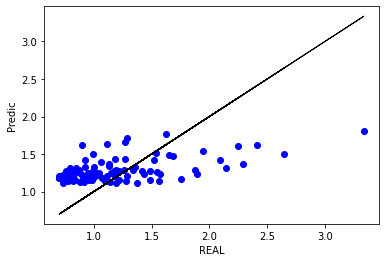

In [ ]:
plt.scatter(y_test, predictions, color='blue')
plt.plot(y_test, y_test, linewidth=1, color='black')
plt.xlabel('REAL')
plt.ylabel('Predic')
plt.show()

In [ ]:
modelo.score(X_train,y_train)

0.48191611952059255

In [ ]:
modelo.score(X_test,y_test)

0.21441407142374902

Aqui hacemos otra regresión con KNN

Text(0.5, 1.0, 'KNN')

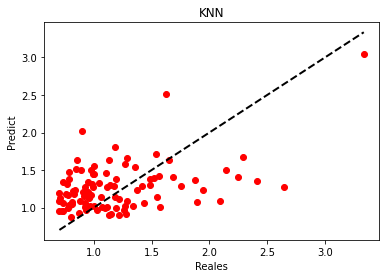

In [ ]:
scaler = StandardScaler()
transformed_X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=0)
model = KNeighborsRegressor(5,metric='euclidean')  
model.fit(X_train,y_train)  
predictions = model.predict(X_test)
plt.scatter(y_test, predictions, color= 'red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Reales')
plt.ylabel('Predict')
plt.title('KNN')


Estas dos funciones lo que nos dan es el coeficiente de determinacion de la prediccion 

In [ ]:
model.score(X_train,y_train)

0.5804118176504927

In [ ]:
model.score(X_test,y_test)

0.12998160434485972

Regression assumption on Y

In [ ]:
import statsmodels.api as sm
xc = sm.add_constant(X) #ESte comando hace la ordenada 
model = sm.OLS(Y,xc) #HAce la regresion sin la prdensfa al orignen por default
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Field-Weighted Citation Impact   R-squared:                       0.465
Model:                                        OLS   Adj. R-squared:                  0.461
Method:                             Least Squares   F-statistic:                     107.5
Date:                            Sat, 18 Mar 2023   Prob (F-statistic):           6.97e-66
Time:                                    03:59:27   Log-Likelihood:                -340.06
No. Observations:                             500   AIC:                             690.1
Df Residuals:                                 495   BIC:                             711.2
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9768      0.037     26.051      0.000       0.903       1.050
FWCI                          0.0254      0.002     10.715      0.000       0.021       0.030
h-index                       0.0028      0.001      2.170      0.030       0.000       0.005
Views                     -9.707e-05      0.000     -0.932      0.352      -0.000       0.000
Citations per Publication     0.0005   3.61e-05     14.220      0.000       0.000       0.001
==============================================================================
Omnibus:                      112.731   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.003
Skew:                           1.105   Prob(JB):                     1.18e-65
Kurtosis:                       6.077   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

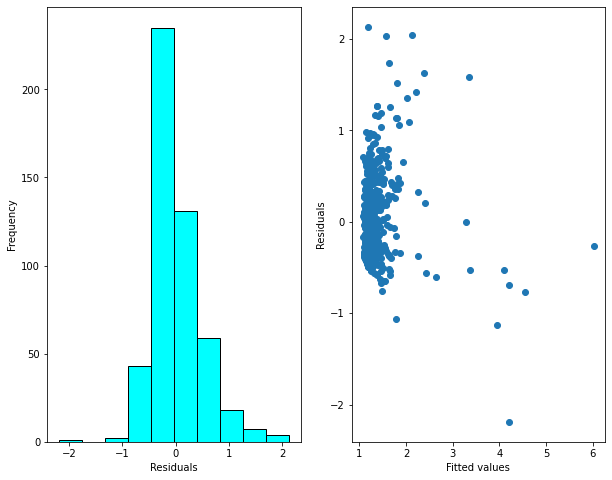

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
ax[0].hist(results.resid,ec='black',color='cyan')
ax[1].scatter(results.fittedvalues,results.resid)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Residuals')
plt.show()

In [ ]:
results.params

const                        0.976775
FWCI                         0.025375
h-index                      0.002787
Views                       -0.000097
Citations per Publication    0.000514
dtype: float64

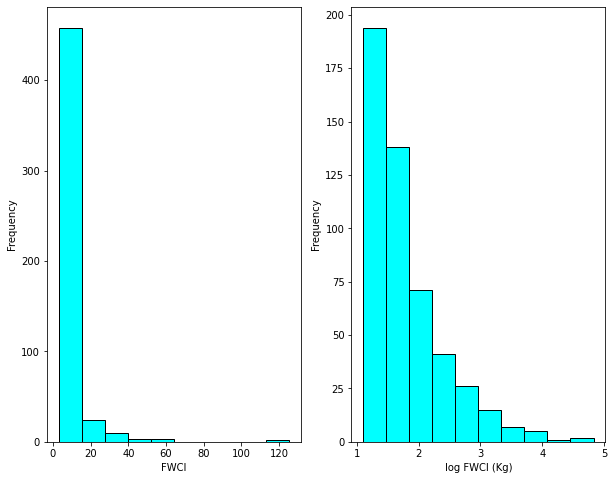

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
ax[0].hist(final_df['FWCI'],ec='black',color='cyan')
ax[1].hist(np.log(final_df['FWCI']),ec='black',color='cyan')
ax[0].set_xlabel('FWCI')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('log FWCI (Kg)')
ax[1].set_ylabel('Frequency')
plt.show()

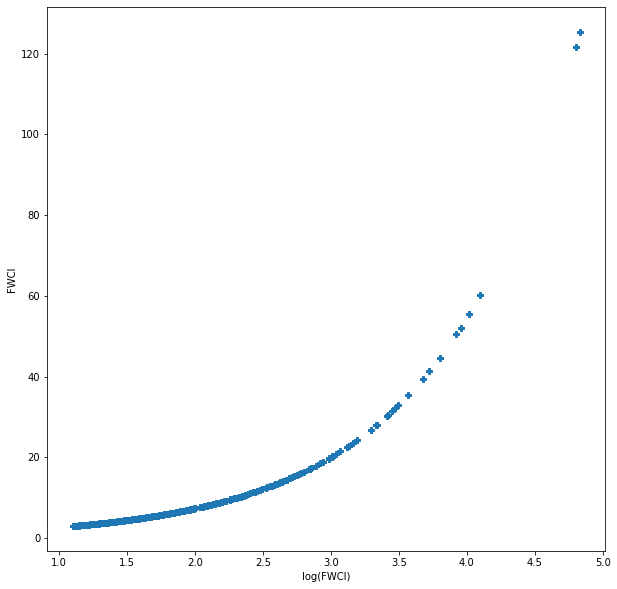

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(np.log(final_df['FWCI']),'FWCI',linestyle='None',marker='P',data=final_df)
plt.xlabel('log(FWCI)')
plt.ylabel('FWCI')
plt.show()

La regresion con predictor transformada no funciona en nuestro caso

In [ ]:
X_train


,FWCI,h-index,Views,Citations per Publication
2096,7.797500,11.0,66.000000,46.0
8143,4.208000,11.0,93.500000,140.0
1630,5.155000,8.0,153.500000,70.8
16286,5.437500,18.0,13.500000,80.0
110,18.970000,10.0,118.000000,75.6
...,...,...,...,...
7233,4.455000,11.0,25.250000,65.6
3530,3.880000,12.0,84.600000,167.5
2382,10.523333,31.0,135.666667,593.4
1046,22.664286,20.0,67.571429,319.9


In [ ]:
X_train.describe()

,FWCI,h-index,Views,Citations per Publication
count,400.000000,400.000000,400.000000,400.000000
mean,8.269721,21.075000,88.134479,273.658000
std,11.232158,17.387933,228.491320,674.101729
min,3.000000,8.000000,0.000000,2.300000
25%,3.826250,10.000000,24.107143,49.775000
50%,4.985833,15.000000,43.916667,120.000000
75%,7.923500,25.000000,72.092857,245.900000
max,125.360000,147.000000,2908.600000,6614.800000


In [ ]:
X_test

,FWCI,h-index,Views,Citations per Publication
1866,3.705000,23.0,28.500000,320.0
5167,4.092500,8.0,5.500000,75.6
5795,5.221250,55.0,91.250000,408.0
15853,3.656667,27.0,32.333333,54.0
16136,20.283333,19.0,104.000000,212.4
...,...,...,...,...
11700,6.643333,8.0,54.666667,123.9
1305,4.220000,13.0,58.000000,88.6
15741,6.190000,24.0,10.111111,108.9
1345,3.040000,13.0,22.600000,149.5


Intentare hacer un arbol de decisiones 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=0)


In [ ]:
model = DecisionTreeRegressor(max_depth=3)  
model.fit(X_train,y_train)  
predictions = model.predict(X_test)

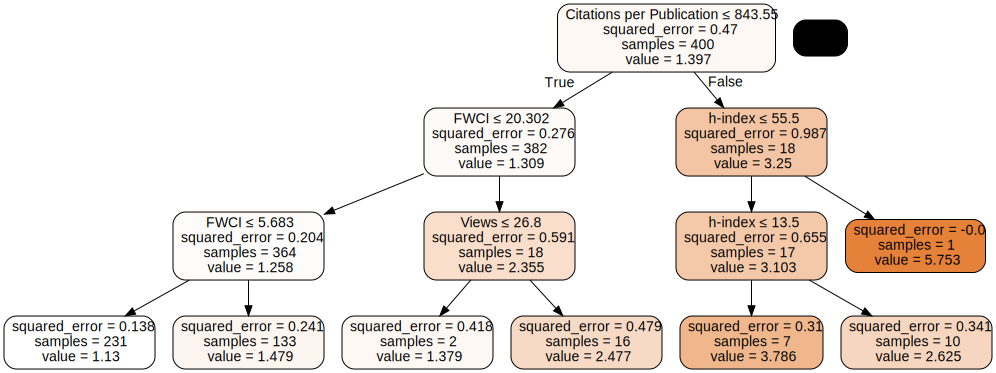

In [ ]:
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns.values,  
                           filled=True,rounded=True,  
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
graphviz.Source(graph.to_string())

In [ ]:
accuracy = tree.score(X_test, y_test)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
model.score(X_train,y_train)

0.6218515540998549

In [ ]:
model.score(X_test,y_test)

0.30605901764103927

In [ ]:
final_df.drop(final_df[(final_df['Citations per Publication'] < 843.55)].index, inplace=True)

In [ ]:
final_df.shape

(19, 6)

In [ ]:
final_df.drop(final_df[(final_df['h-index'] < 13.55)].index, inplace=True)

In [ ]:
final_df.shape

(12, 6)

In [ ]:
final_df.drop(final_df[(final_df['FWCI'] < 20.30)].index, inplace=True)

In [ ]:
final_df.shape

(3, 6)

In [ ]:
final_df.drop(final_df[(final_df['Views'] < 26.8)].index, inplace=True)

In [ ]:
final_df.shape

(3, 6)

In [ ]:
final_df

,Autores_chido,Field-Weighted Citation Impact,FWCI,h-index,Views,Citations per Publication
5095,56398612400,33.87,39.402000,32.0,210.600000,4226.5
9020,57202824584,315.05,121.710000,66.0,1325.000000,3700.0
14928,6602470623,6.49,30.448571,22.0,2091.714286,1246.7
